# Customer Churn Analysis for a Telecom Company

by:

1. Pablo Macaraeg
2. John-Derek Requejo
3. Jennifer Macaraeg

# Data Preparation and Pre-prediction Analysis

In [5]:
#Loading of the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns




In [6]:
# Loading the data into the Pandas dataframe

df = pd.read_csv("customer_churn.csv")
df.shape

(3333, 21)

In [7]:
# Let's take a look at the data, first few rows:
df.head(10)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [8]:
# Checking total of any missing values per column.

df.isnull().sum()

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
dtype: int64

In [9]:
#There are no missing values shown above and based from the table summary below, all columns have 3333 records/rows.
#Below are the statistical measurement of each attributes.Which show that there are outliers.

df.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [10]:
df.describe(include=['O'])

,State,Phone,Int'l Plan,VMail Plan,Churn?
count,3333,3333,3333,3333,3333
unique,51,3333,2,2,2
top,WV,416-1536,no,no,False.
freq,106,1,3010,2411,2850


In [11]:
#Display the columns to explore.

print(df.columns)

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')


In [12]:
#Replacing boolean (True., False., yes, no) to binary to easily calculate values.

df["Churn?"].replace(['True.', 'False.'], [1, 0], inplace=True)
df["VMail Plan"].replace(['yes', 'no'], [1, 0], inplace=True)
df["Int'l Plan"].replace(['yes', 'no'], [1, 0], inplace=True)

df.head()


,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [13]:
d_State = df['State'].unique()
d_State

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [14]:
len(d_State)

51

In [15]:
print("The overall churn rate of the data set is", round(df['Churn?'].sum()/len(df)*100,2),'%')

The overall churn rate of the data set is 14.49 %


In [16]:
#The data set is imbalanced as shown above.

# Now we explore each attribute.

In [17]:
Churn_size_by_state = df[['State', 'Churn?']].groupby(['State']
                                                      , as_index=False).sum().sort_values(by='Churn?'
                                                                                          , ascending=False)

Churn_size_by_state

#Below is the number of accounts churned per state

,State,Churn?
31,NJ,18
43,TX,18
20,MD,17
22,MI,16
23,MN,15
34,NY,15
26,MT,14
33,NV,14
25,MS,14
40,SC,14


In [18]:
Churn_rate_by_state = df[['State', 'Churn?']].groupby(['State']
                                                      , as_index=False).mean().sort_values(by='Churn?'
                                                                                           , ascending=False)
Churn_rate_by_state

,State,Churn?
31,NJ,0.264706
4,CA,0.264706
43,TX,0.250000
20,MD,0.242857
40,SC,0.233333
22,MI,0.219178
25,MS,0.215385
33,NV,0.212121
47,WA,0.212121
21,ME,0.209677


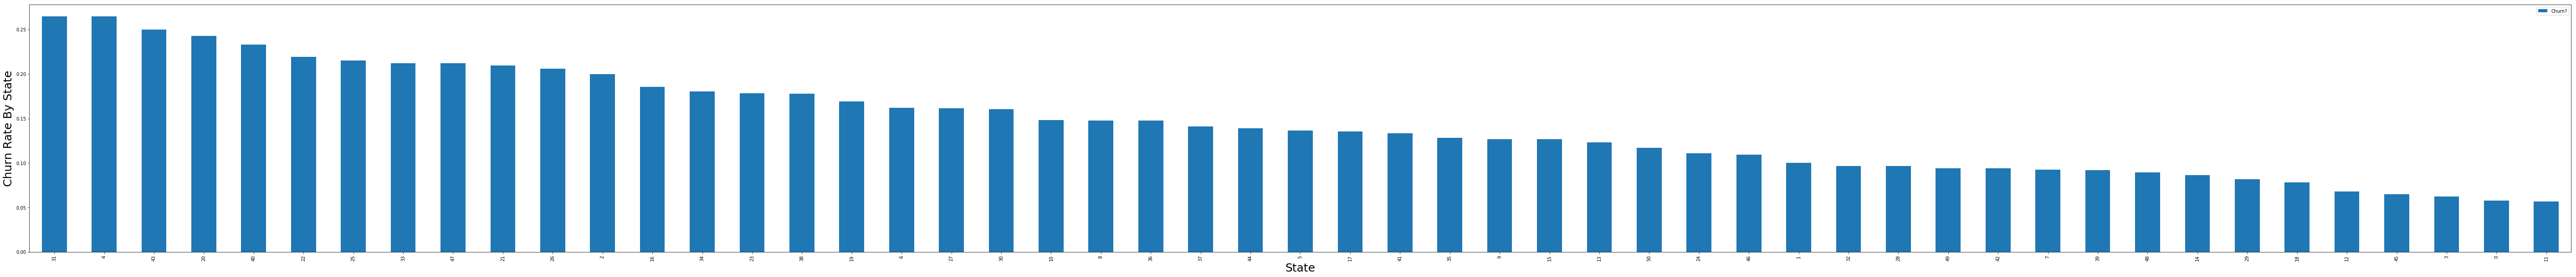

In [19]:
Churn_rate_by_state.plot( kind= 'bar', figsize=(100,10))
plt.xlabel('State', fontsize=25)
plt.ylabel('Churn Rate By State', fontsize=25)
plt.show()

In [20]:
#Range of churn rate by state is from 5% to 26%. NJ and CA the highest and AK and HI the lowest. 

In [21]:
# Replace State with unique numeric values

i = 1
for state in d_State:
    df["State"].replace([state], [i], inplace=True)
    i=i+1
df.head()  

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,1,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,2,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,3,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,2,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [22]:
#Converted "State" to numeric above to calculate correlation
print(round(df['Churn?'].corr(df['State'])*100,2),"%")

2.19 %


In [23]:
df[['Account Length', 'Churn?']].groupby(['Account Length']
                                         , as_index=False).mean().sort_values(by='Churn?'
                                                                              , ascending=False).head()

,Account Length,Churn?
201,208,1.0
1,2,1.0
185,188,1.0
209,225,0.5
208,224,0.5


In [24]:
Account_Length= df["Account Length"]

In [25]:
Account_Length.head(10)

0    128
1    107
2    137
3     84
4     75
5    118
6    121
7    147
8    117
9    141
Name: Account Length, dtype: int64

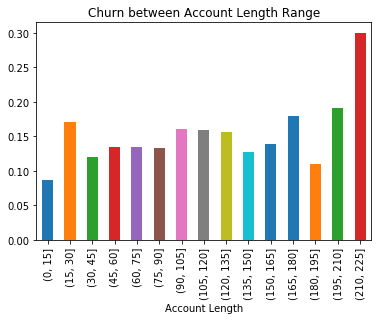

In [26]:
Account_Length =  pd.cut(df["Account Length"], np.arange(0,230,15)) #Range(from,to,intervals)
AL_Grouping = df.groupby(Account_Length).mean()
plt.title("Churn between Account Length Range")
AL_Grouping["Churn?"].plot.bar()

In [27]:
Account_Churn=df.groupby([Account_Length, "Churn?"]).size()
Account_Churn.head(10)

Account Length  Churn?
(0, 15]         0          42
                1           4
(15, 30]        0          68
                1          14
(30, 45]        0         133
                1          18
(45, 60]        0         201
                1          31
(60, 75]        0         327
                1          51
dtype: int64

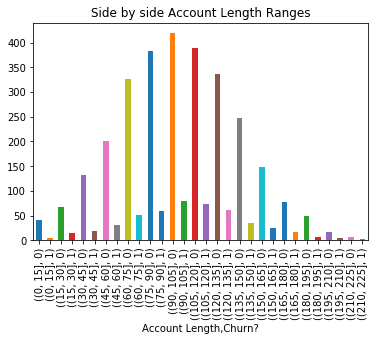

In [28]:
plt.title("Side by side Account Length Ranges")
Account_Churn.plot.bar()

In [29]:
print(round(df['Churn?'].corr(df['Account Length'])*100,2),"%")

1.65 %


In [30]:
# Account Length has no direct impact to churn from above charts.
# The correlation factor is only 1.65% and considered very weak. 
# We can drop the Account Length attribute in the analysis.

In [31]:
Area_Code = df[['Area Code', 'Churn?']].groupby(['Area Code']
                                                , as_index=False).mean().sort_values(by='Churn?'
                                                                                     , ascending=False)
Area_Code

,Area Code,Churn?
2,510,0.148810
0,408,0.145585
1,415,0.142598


In [32]:
print(round(df['Churn?'].corr(df['Area Code'])*100,2),"%")

0.62 %


C:\Users\effer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


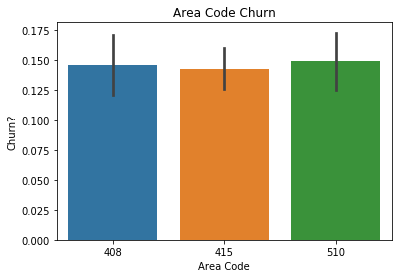

In [46]:
#Graphing attribute
sns.barplot(x='Area Code', y='Churn?', data=df)
plt.title("Area Code Churn")
plt.show()

In [47]:
#Based from above, we can disregard this attribute as the churn rate by area code is relatively uniform and 
#correlation to churn is almost nil, thus, no impact on churn.

In [48]:
df[["Int'l Plan", 'Churn?']].groupby(["Int'l Plan"]
                                     , as_index=False).mean().sort_values(by='Churn?'
                                                                          , ascending=False).head()

,Int'l Plan,Churn?
1,1,0.424149
0,0,0.114950


In [49]:
print(round(df['Churn?'].corr(df["Int'l Plan"])*100,2),"%")

25.99 %


C:\Users\effer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


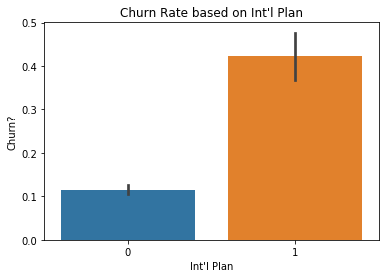

In [50]:
sns.barplot(x="Int'l Plan", y='Churn?', data=df)
plt.title("Churn Rate based on Int'l Plan")
plt.show()

#View of churn rate on Int'l Plan

In [51]:
#Churn rate of customers with "Int'l Plan" is almost 4x greater than customers 
#without "Int'l Plan

In [52]:
VMail_Plan = df[['VMail Plan', 'Churn?']].groupby(['VMail Plan']
                                                  , as_index=False).mean().sort_values(by='Churn?'
                                                                                       , ascending=False).head()
VMail_Plan

,VMail Plan,Churn?
0,0,0.167151
1,1,0.086768


In [53]:
print(round(df['Churn?'].corr(df["VMail Plan"])*100,2),"%")

-10.21 %


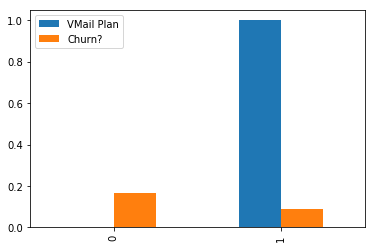

In [54]:
# Simple bar graph to represent Churn with and without VMail Plan on customer's account
VMail_Plan.plot.bar()

In [55]:
# The churn rate of 'without VMail plan' is twice as that of 'with VMail' plan. 
# We can use this attribute.

In [56]:
VMail_Message = df[['VMail Message', 'Churn?']].groupby(['VMail Message']
                                                        , as_index=False).mean().sort_values(by='Churn?'
                                                                                             , ascending=False).head()
                                                                
VMail_Message

,VMail Message,Churn?
42,48,0.500000
12,18,0.285714
38,44,0.285714
36,42,0.266667
35,41,0.230769


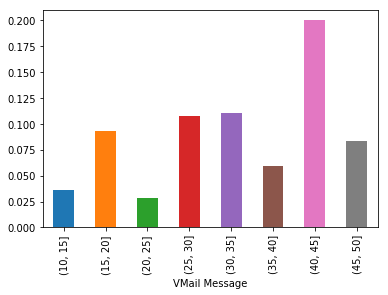

In [57]:
VMailMessage =  pd.cut(df["VMail Message"], np.arange(10,55,5))#Range(from,to,intervals)
VM_Grouping = df.groupby(VMailMessage).mean()
VM_Grouping["Churn?"].plot.bar()

In [58]:
print(round(df['Churn?'].corr(df["VMail Message"])*100,2),"%")

-8.97 %


In [59]:
VMail_Churn=df.groupby([VMailMessage, "Churn?"]).size()
VMail_Churn.head(10)

VMail Message  Churn?
(10, 15]       0          27
               1           1
(15, 20]       0          68
               1           7
(20, 25]       0         170
               1           5
(25, 30]       0         208
               1          25
(30, 35]       0         185
               1          23
dtype: int64

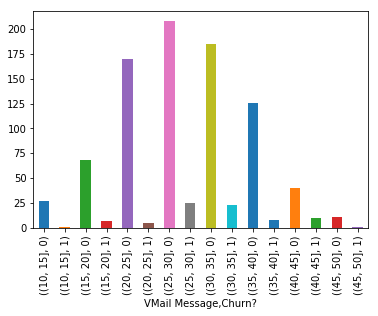

In [60]:
VMail_Churn.plot.bar()

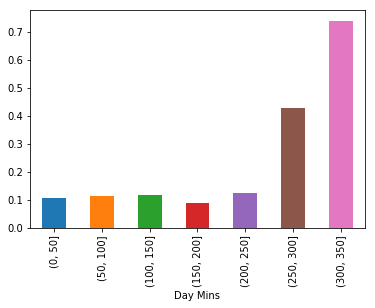

In [61]:
Day_Mins = pd.cut(df['Day Mins'], np.arange(0,360,50))
Day_Mins_Grouping = df.groupby(Day_Mins).mean()
Day_Mins_Grouping["Churn?"].plot.bar()

In [62]:
print(round(df['Churn?'].corr(df["Day Mins"])*100,2),"%")

20.52 %


In [63]:
Day_Mins_Churn=df.groupby([Day_Mins, "Churn?"]).size()
Day_Mins_Churn.head(10)

Day Mins    Churn?
(0, 50]     0           25
            1            3
(50, 100]   0          185
            1           24
(100, 150]  0          652
            1           88
(150, 200]  0         1063
            1          105
(200, 250]  0          750
            1          108
dtype: int64

In [64]:
# Churn rate from 0 to 250 minutes is close to 10% then jumped to around 40% then 70% 
# for the 251-300 and 301-350 day minutes range(s).

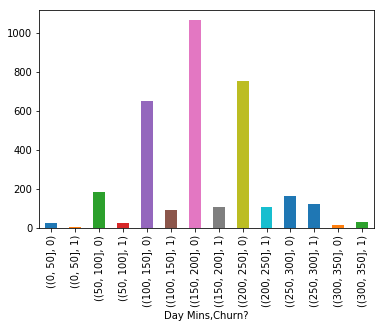

In [65]:
Day_Mins_Churn.plot.bar()

In [66]:
Day_Mins = df[['Day Mins', 'Churn?']].groupby(['Day Mins']
                                              , as_index=False).mean().sort_values(by='Churn?'
                                                                                   , ascending=False).head()
Day_Mins

,Day Mins,Churn?
1666,350.8,1.0
1463,260.1,1.0
137,90.0,1.0
1462,260.0,1.0
1458,259.4,1.0


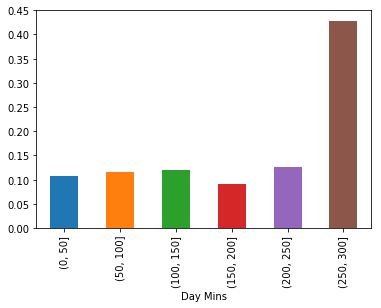

In [67]:
Day_Min =  pd.cut(df["Day Mins"], np.arange(0,350,50))#Range(from,to,intervals)
DM_Grouping = df.groupby(Day_Min).mean()
DM_Grouping["Churn?"].plot.bar()

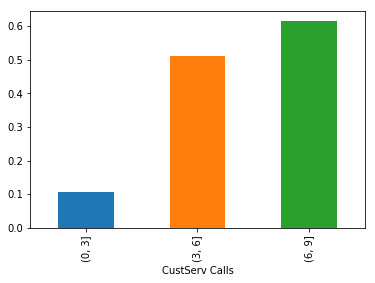

In [68]:
Cust_Serv = pd.cut(df['CustServ Calls'], np.arange(0,10,3))
Cust_Serv_Grouping = df.groupby(Cust_Serv).mean()
Cust_Serv_Grouping["Churn?"].plot.bar()

In [69]:
print(round(df['Churn?'].corr(df["CustServ Calls"])*100,2),"%")

20.87 %


In [70]:
#Churn rate relating to the number of "CustServ Calls" 
#for the first three calls is around 10% and increases significantly 
#just over 50% on the 4th to 6th "CustServ Calls". Once it reaches over 7 "CustServ Calls", 
#we are over 60% Churn rate.

In [71]:
Cust_Serv_Churn=df.groupby([Cust_Serv, "Churn?"]).size()
Cust_Serv_Churn

CustServ Calls  Churn?
(0, 3]          0         2116
                1          253
(3, 6]          0          124
                1          130
(6, 9]          0            5
                1            8
dtype: int64

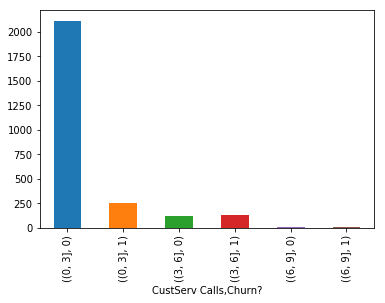

In [72]:
Cust_Serv_Churn.plot.bar()

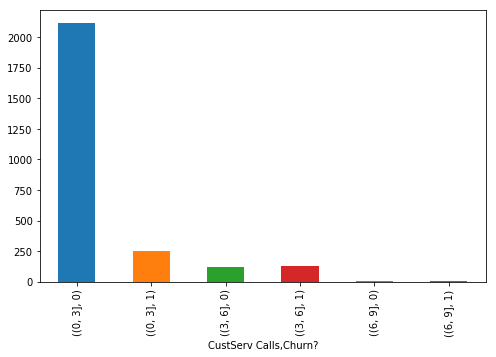

In [73]:
Cust_Serv_Churn.plot(kind= 'bar', figsize=(8,5))
#plt.xlabel('Customer Serv calls', fontsize=18)
#plt.ylabel('Count of Customer Serv calls', fontsize=18)
plt.show()

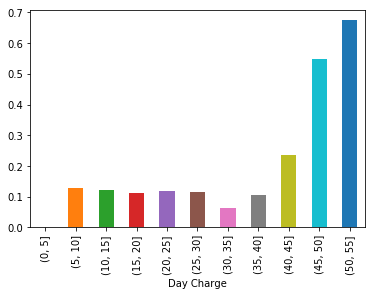

In [74]:
Day_Char = pd.cut(df['Day Charge'], np.arange(0,60,5))
Day_Char_Grouping = df.groupby(Day_Char).mean()
Day_Char_Grouping["Churn?"].plot.bar()

In [75]:
print(round(df['Churn?'].corr(df["Day Charge"])*100,2),"%")

20.52 %


In [76]:
#Day charge from 5 to 40 has a lillte more than 10% churn rate except for (30,40] range which has less than 10%.
#We see significant increase starting from (45,50] range at around 55% from (45,50] twhich has the highest churn 
#rate at around 68%.

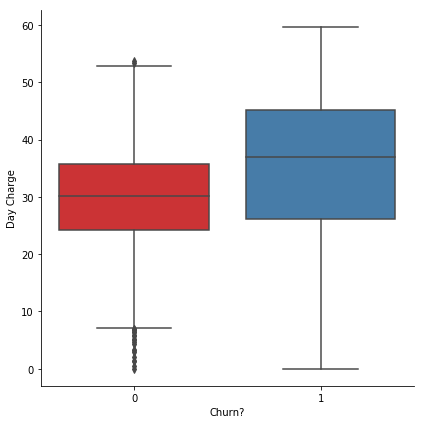

In [77]:
g = sns.factorplot(y="Day Charge", x="Churn?", data=df,
                   size=6, kind="box", palette="Set1")

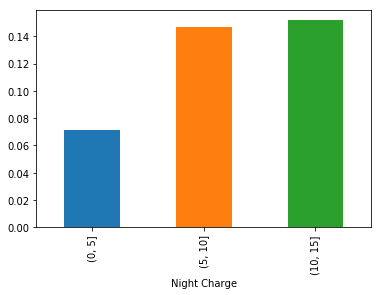

In [78]:
Night_Char = pd.cut(df['Night Charge'], np.arange(0,18,5))
Night_Char_Grouping = df.groupby(Night_Char).mean()
Night_Char_Grouping["Churn?"].plot.bar()

In [79]:
print(round(df['Churn?'].corr(df["Night Charge"])*100,2),"%")

3.55 %


In [80]:
#Churn rate almost doubled after 5 night charge from 7% to 15%.

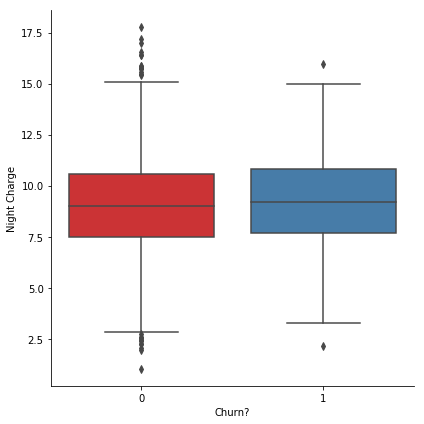

In [81]:
g = sns.factorplot(y="Night Charge", x="Churn?", data=df,
                   size=6, kind="box", palette="Set1")
plt.show()

In [82]:
Day_Calls = df[['Day Calls', 'Churn?']].groupby(['Day Calls'], as_index=False).mean().sort_values(by='Churn?', ascending=False).head()

Day_Calls

,Day Calls,Churn?
118,165,1.000000
113,156,1.000000
6,44,0.666667
9,48,0.666667
8,47,0.500000


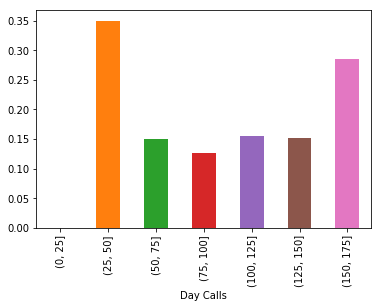

In [83]:
Day_Call = pd.cut(df['Day Calls'], np.arange(0,200,25))
Day_Call_Grouping = df.groupby(Day_Call).mean()
Day_Call_Grouping["Churn?"].plot.bar()

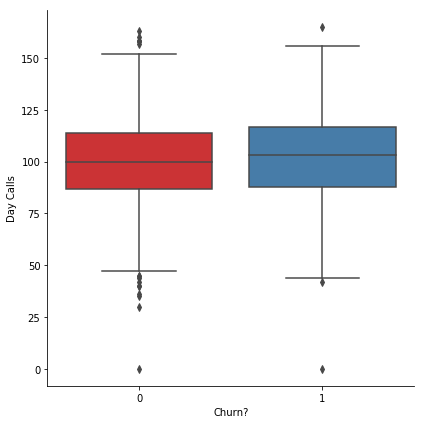

In [84]:
g = sns.factorplot(y="Day Calls", x="Churn?", data=df,
                   size=6, kind="box", palette="Set1")
plt.show()

In [85]:
print(round(df['Churn?'].corr(df["Day Calls"])*100,2),"%")

1.85 %


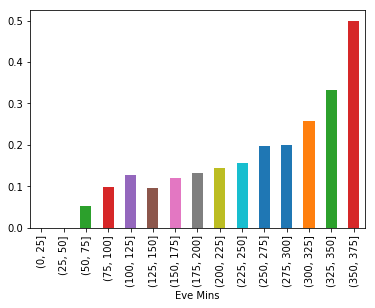

In [86]:
Eve_Min = pd.cut(df['Eve Mins'], np.arange(0,400,25))
Eve_Min_Grouping = df.groupby(Eve_Min).mean()
Eve_Min_Grouping["Churn?"].plot.bar()

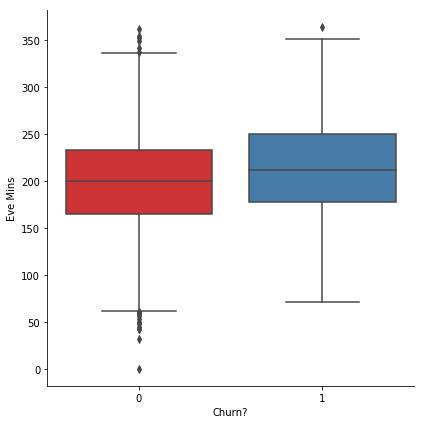

In [87]:
g = sns.factorplot(y="Eve Mins", x="Churn?", data=df,
                   size=6, kind="box", palette="Set1")
plt.show()

In [88]:
print(round(df['Churn?'].corr(df["Eve Mins"])*100,2),"%")

9.28 %


In [89]:
#The higher the evening minutes, the higher the churn rate. Exception can be seen from the 125-150 range
#where it went down temporarily, then started to climb again.

In [90]:
Eve_Mins = df[['Eve Mins', 'Churn?']].groupby(['Eve Mins']
                                              , as_index=False).mean().sort_values(by='Churn?'
                                                                                   , ascending=False).head()

Eve_Mins

,Eve Mins,Churn?
1610,363.7,1.0
1281,255.7,1.0
842,205.7,1.0
1269,253.9,1.0
1512,293.1,1.0


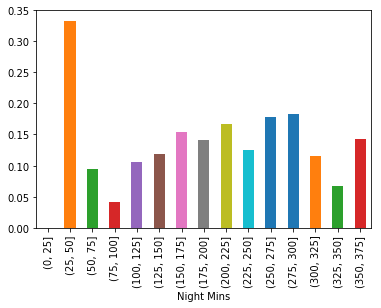

In [91]:
Night_Min = pd.cut(df['Night Mins'], np.arange(0,400,25))
Night_Min_Grouping = df.groupby(Night_Min).mean()
Night_Min_Grouping["Churn?"].plot.bar()

In [92]:
print(round(df['Churn?'].corr(df["Night Mins"])*100,2),"%")

3.55 %


In [93]:
Night_Mins = df[['Night Mins', 'Churn?']].groupby(['Night Mins'], as_index=False).mean().sort_values(by='Churn?', ascending=False).head()

Night_Mins

,Night Mins,Churn?
149,120.1,1.0
1353,265.2,1.0
1309,259.8,1.0
132,117.0,1.0
810,202.8,1.0


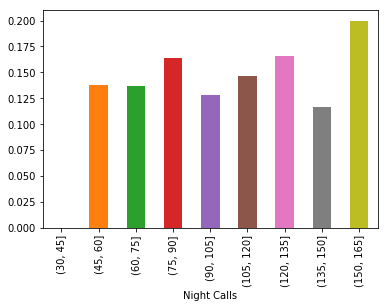

In [94]:
Night_Call = pd.cut(df['Night Calls'], np.arange(30,175,15))
Night_Call_Grouping = df.groupby(Night_Call).mean()
Night_Call_Grouping["Churn?"].plot.bar()

In [95]:
print(round(df['Churn?'].corr(df["Night Calls"])*100,2),"%")

0.61 %


In [96]:
Night_Calls = df[['Night Calls', 'Churn?']].groupby(['Night Calls']
                                                    , as_index=False).mean().sort_values(by='Churn?'
                                                                                         , ascending=False).head()

Night_Calls

,Night Calls,Churn?
116,158,1.000000
110,152,0.666667
7,49,0.500000
9,51,0.500000
90,132,0.375000


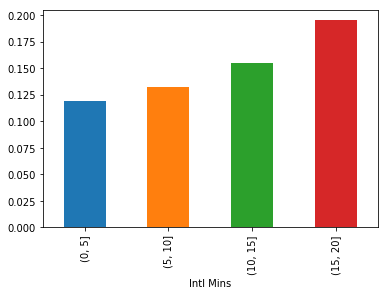

In [97]:
Int_Min = pd.cut(df["Intl Mins"], np.arange(0,25,5))
Int_Min_Grouping = df.groupby(Int_Min).mean()
Int_Min_Grouping["Churn?"].plot.bar()

In [98]:
print(round(df['Churn?'].corr(df["Intl Mins"])*100,2),"%")

6.82 %


In [99]:
#The higher the international minutes used, the higher the chance of churning.

In [100]:
Intl_Mins = df[['Intl Mins', 'Churn?']].groupby(['Intl Mins']
                                                , as_index=False).mean().sort_values(by='Churn?'
                                                                                     , ascending=False).head()

Intl_Mins

,Intl Mins,Churn?
161,20.0,1.000000
158,18.3,1.000000
155,17.9,1.000000
151,17.3,0.666667
118,13.9,0.647059


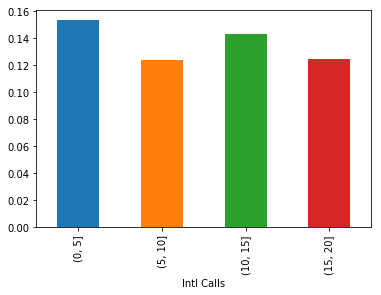

In [101]:
Int_Call = pd.cut(df["Intl Calls"], np.arange(0,25,5))
Int_Call_Grouping = df.groupby(Int_Call).mean()
Int_Call_Grouping["Churn?"].plot.bar()

In [102]:
print(round(df['Churn?'].corr(df["Intl Calls"])*100,2),"%")

-5.28 %


In [103]:
#It seems that after 5 international calls churn rate decreases steadily except that of the 10-15 range where it went up a bit
#after the (5-10] calls.

In [104]:
Intl_Calls = df[['Intl Calls', 'Churn?']].groupby(['Intl Calls']
                                                  , as_index=False).mean().sort_values(by='Churn?'
                                                                                       , ascending=False).head()

Intl_Calls

,Intl Calls,Churn?
20,20,1.000000
15,15,0.428571
2,2,0.220859
1,1,0.193750
14,14,0.166667


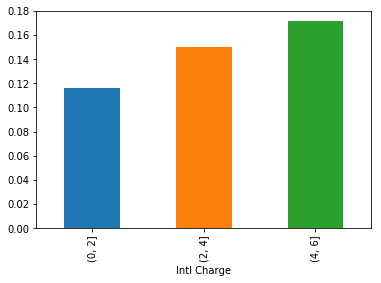

In [105]:
Int_Char = pd.cut(df["Intl Charge"], np.arange(0,8,2))
Int_Char_Grouping = df.groupby(Int_Char).mean()
Int_Char_Grouping["Churn?"].plot.bar()

In [106]:
print(round(df['Churn?'].corr(df["Intl Charge"])*100,2),"%")

6.83 %


In [107]:
#The higher the internation charge, the higher the churn rate.

In [108]:
Intl_Charge = df[['Intl Charge', 'Churn?']].groupby(['Intl Charge']
                                                    , as_index=False).mean().sort_values(by='Churn?'
                                                                                         , ascending=False).head()

Intl_Charge

,Intl Charge,Churn?
161,5.40,1.000000
158,4.94,1.000000
155,4.83,1.000000
151,4.67,0.666667
118,3.75,0.647059


# Predictive Modeling and Classification

In [109]:
# Drop the columns that will not be used as factors for analysis

df2=df.drop(['State','Phone', 'Account Length', 'Area Code','VMail Message', 'Day Calls'
            ,'Night Mins', 'Night Calls'],axis=1)

In [110]:
df2.head()

,Int'l Plan,VMail Plan,Day Mins,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,0,1,265.1,45.07,197.4,99,16.78,11.01,10.0,3,2.70,1,0
1,0,1,161.6,27.47,195.5,103,16.62,11.45,13.7,3,3.70,1,0
2,0,0,243.4,41.38,121.2,110,10.30,7.32,12.2,5,3.29,0,0
3,1,0,299.4,50.90,61.9,88,5.26,8.86,6.6,7,1.78,2,0
4,1,0,166.7,28.34,148.3,122,12.61,8.41,10.1,3,2.73,3,0


In [111]:
df2.shape

(3333, 13)

In [112]:
from sklearn.model_selection import train_test_split
X = df2.drop(['Churn?'],axis = 1)
Y = df2["Churn?"]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3)

In [113]:
len(X_train)

2333

In [114]:
len(X_test)

1000

In [115]:
len(Y_test)

1000

In [116]:
len(Y_train)

2333

In [117]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import model_selection

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


models = []

models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))


In [123]:
# At 10 folds split
results = []
names = []
for name,model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_result = model_selection.cross_val_score(model,X_train,Y_train, cv = kfold, scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    #print(names[i],results[i].mean())
    print(names[i],round((results[i].mean())*100,2),"%")
   

NB 85.9 %
CART 90.23 %
RF 94.47 %


In [124]:
#At 10 folds:
#the highest accuracy is Random Forrest,followed by DecisionTreeClassifier then followed by Naive Bayes being the least.

In [125]:
RF = RandomForestClassifier()
RF.fit(X_train,Y_train)
predictions_RF = RF.predict(X_test)

In [126]:
NB = GaussianNB()
NB.fit(X_train,Y_train)
predictions_NB = NB.predict(X_test)

In [127]:
CART = DecisionTreeClassifier()
CART.fit(X_train,Y_train)
predictions_CART = CART.predict(X_test)

In [128]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [129]:
conf = confusion_matrix(Y_test,predictions_RF)

In [130]:
conf

array([[839,  10],
       [ 50, 101]], dtype=int64)

In [131]:
confnb = confusion_matrix(Y_test,predictions_NB)

In [132]:
confnb

array([[774,  75],
       [ 79,  72]], dtype=int64)

In [133]:
confcart = confusion_matrix(Y_test,predictions_CART)

In [134]:
confcart

array([[802,  47],
       [ 40, 111]], dtype=int64)

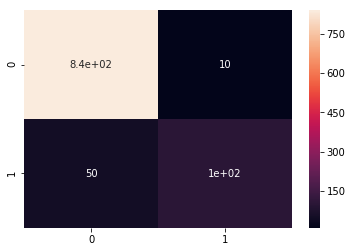

In [135]:
label = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label)
plt.show()

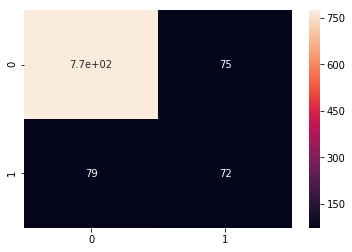

In [136]:
label = ["0","1"]
sns.heatmap(confnb, annot=True, xticklabels=label, yticklabels=label)
plt.show()


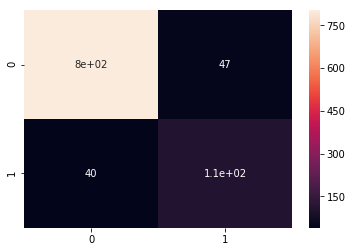

In [137]:
label = ["0","1"]
sns.heatmap(confcart, annot=True, xticklabels=label, yticklabels=label)
plt.show()

In [138]:
# At 3 folds split
results = []
names = []
for name,model in models:
    kfold = model_selection.KFold(n_splits=3)
    cv_result = model_selection.cross_val_score(model,X_train,Y_train, cv = kfold, scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    #print(names[i],results[i].mean())
    print(names[i],round((results[i].mean())*100,2),"%")
    


NB 86.2 %
CART 91.34 %
RF 93.36 %


In [ ]:
# Almost Same result as above at 10 folds.

# Balancing of Data

In [ ]:
# Based on the given dataset, the data is imbalance based on churn rate, hence, we need to 
# balance the data to have more accurate prediction.
# To balance the data, we replicated the churn rows multiple times until the data become
# balanced.

In [139]:
df_new = df2[df2['Churn?'] == 1] # get the churn rows only since this is the minority
df_new2 = df2.append(df_new)
df_new3 = df_new2.append(df_new)
df_new4 = df_new3.append(df_new)
df_new5 = df_new4.append(df_new)
df_new6 = df_new5.append(df_new)

df_new6.shape

(5748, 13)

In [140]:
df_new6.describe()

,Int'l Plan,VMail Plan,Day Mins,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
count,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000
mean,0.175365,0.229993,191.177436,32.500699,205.782533,100.302018,17.491682,9.121759,10.431698,4.346729,2.817084,1.843076,0.504175
std,0.380312,0.420865,62.417090,10.610933,51.430491,19.832392,4.371499,2.213381,2.800521,2.503311,0.756124,1.597504,0.500026
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,146.800000,24.960000,169.900000,87.000000,14.440000,7.600000,8.700000,3.000000,2.350000,1.000000,0.000000
50%,0.000000,0.000000,189.100000,32.150000,206.900000,101.000000,17.590000,9.160000,10.400000,4.000000,2.810000,1.000000,1.000000
75%,0.000000,0.000000,237.125000,40.312500,241.400000,114.000000,20.520000,10.670000,12.300000,6.000000,3.320000,3.000000,1.000000
max,1.000000,1.000000,350.800000,59.640000,363.700000,170.000000,30.910000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [141]:
from sklearn.model_selection import train_test_split

X = df_new6.drop(['Churn?'],axis = 1)
Y = df_new6["Churn?"]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3)

In [142]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import model_selection

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = []

models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))


In [143]:
# At 3 folds...
results = []
names = []
for name,model in models:
    kfold = model_selection.KFold(n_splits=3)
    cv_result = model_selection.cross_val_score(model,X_train,Y_train, cv = kfold, scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],round((results[i].mean())*100,2),"%")
    

NB 80.49 %
CART 95.5 %
RF 97.56 %


In [144]:
RF = RandomForestClassifier()
RF.fit(X_train,Y_train)
predictions_RF = RF.predict(X_test)

In [145]:
NB = GaussianNB()
NB.fit(X_train,Y_train)
predictions_NB = NB.predict(X_test)

In [146]:
CART = DecisionTreeClassifier()
CART.fit(X_train,Y_train)
predictions_CART = CART.predict(X_test)

In [147]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [148]:
print("Accuracy Score is Random Forest:")
print(round(accuracy_score(Y_test, predictions_RF)*100,2),"%")
print()

Accuracy Score is Random Forest:
98.67 %



In [149]:
print("Accuracy Score for Naive Bayes:")
print(round(accuracy_score(Y_test, predictions_NB)*100,2),"%")
print()

Accuracy Score for Naive Bayes:
80.23 %



In [150]:
print("Accuracy Score for Decision Tree Classifier:")
print(round(accuracy_score(Y_test, predictions_CART)*100,2),"%")
print()

Accuracy Score for Decision Tree Classifier:
96.41 %



In [151]:
conf = confusion_matrix(Y_test,predictions_RF)

In [152]:
conf

array([[847,  23],
       [  0, 855]], dtype=int64)

In [153]:
confnb = confusion_matrix(Y_test,predictions_NB)

In [154]:
confnb

array([[721, 149],
       [192, 663]], dtype=int64)

In [155]:
confcart = confusion_matrix(Y_test,predictions_CART)

In [156]:
confcart

array([[808,  62],
       [  0, 855]], dtype=int64)

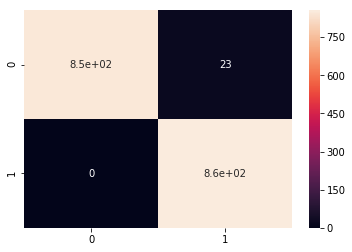

In [157]:
label = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label)
plt.show()

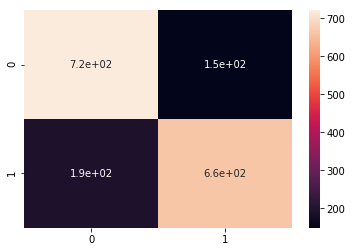

In [158]:
label = ["0","1"]
sns.heatmap(confnb, annot=True, xticklabels=label, yticklabels=label)
plt.show()

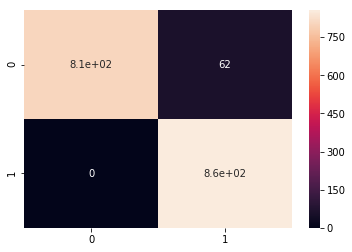

In [159]:
label = ["0","1"]
sns.heatmap(confcart, annot=True, xticklabels=label, yticklabels=label)
plt.show()

In [160]:
# At 10 folds...
results = []
names = []
for name,model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_result = model_selection.cross_val_score(model,X_train,Y_train, cv = kfold, scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],round((results[i].mean())*100,2),"%")

NB 80.26 %
CART 96.72 %
RF 98.58 %


In [161]:
#Same observation as above. Random still has the highest accuracy result and Naive Bayes, the lowest.

# Conclusions and Recommendations

The natural tendency of the result of the churn output of this exercise is what could be leveraged by businesses.

We can produce a model from our data, given the data structure will be scrubbed that we can work with. We ran our initial results to perform the process of elimination, predictions, modelling and visualization. Using a larger volume of dataset can boost our models accuracy.

Businesses can create a strategy to retain customers based on the result of the predictive model:

•	The more customer service calls, the higher the chance that the customer will churn. Based on the analysis of the service calls, customer issues should be resolved within the first 3 calls to increase the likelihood of retaining the customer.

•	Based on the results of the “charges” analysis (Day, Eve, Int’l), the higher the rates, the more customers are likely to churn. The business should review their rates to be more competitive vs other telecom companies.


